In [14]:
import numpy as np # добавляет массивы и математику
import sys 

import time

from matplotlib import pyplot as plt # для графиков

In [15]:
import cv2

In [20]:
last = time.time()


mul = 0
for ai, bi in zip(a, b):
    mul+= ai* bi 

print(mul ,time.time() - last)    

1214590843366 1.8640351295471191


In [21]:
last = time.time()

ma = np.array(a)
mb = np.array(b)

mul = np.dot(ma, mb)
print(mul ,time.time() - last)   

-884901402 1.671391248703003


In [19]:
class MLP:
    def __init__ (self, n_hidden=30, l2=0, epochs=100, eta = 0.001, shuffle=True, minibatch_size=1, seed=42):
        self.random = np.random.RandomState(seed)
        self.n_hidden = n_hidden
        self.l2 = l2 
        self.epochs = epochs
        self.eta = eta
        self.shuffle = shuffle
        self.minibatch_size = minibatch_size
    
    def _onehot (self, y, n_classes):
        onehot = np.zeros( (n_classes, y.shape[0] ) )
        
        for idx, val in enumerate(y.astype(int)):
            onehot[val, idx] = 1
        
        return onehot.T
    
    def _sigmoid(self, z):
        return 1./(1. + np.exp(-np.clip(z, -250, 250)))
    
    def _forward(self, X):
        # гигасумма для скрытого слоя
        z_h = np.dot(X, self.w_h) + self.b_h
        # активация
        a_h = self._sigmoid(z_h)
        # гигасумма для слоя dsвыходного
        z_out = np.dot(a_h, self.w_out ) + self.b_out
        # активация активация выходного слоя
        a_out = self._sigmoid(z_out)
        
        return z_h, a_h, z_out, a_out
    
    def _compute_cost (self, y_enc, output):
        L2_term = (self.l2 * (np.sum(self.w_h ** 2) + np.sum(self.w_out ** 2) ) )
        
        term1 = -y_enc * (np.log(output))
        term2 = (1 - y_enc) * np.log(1 - output)
        
        cost = np.sum(term1 - term2) + L2_term 
        return cost
    
    def predict (self, X):
        z_h, a_h, z_out, a_out = self._forward(X)
        
        y_pred = np.argmax(z_out, axis=1)
        return y_pred
    
    def fit(self, X_train, y_train, X_valid, y_valid):
        # кол-во меток (кол-во выходов)
        n_output = np.unique(y_train).shape[0]
        # кол-во признаков
        n_features = X_train.shape[1]
        
        
        self.b_h = np.zeros(self.n_hidden ) # warum zero ? किन
        self.w_h = self.random.normal( loc = 0.0, scale=0.1, size=(n_features, self.n_hidden ) )
        
        self.b_out = np.zeros(n_output)
        self.w_out = self.random.normal(loc=0.0, scale=0.1, size=(self.n_hidden, n_output))
        
        # для того чтобы красиво принтить
        epoh_strlen = len(str(self.epochs))
        
        y_train_enc = self._onehot(y_train, n_output)
        
        for i in range(self.epochs):
            indices = np.arange(X_train.shape[0])
            
            if self.shuffle:
                self.random.shuffle(indices)
            
            for start_idx in range(0, indices.shape[0] - self.minibatch_size + 1, self.minibatch_size ):
                
                batch_idx = indices[start_idx: start_idx + self.minibatch_size ]
                
                # forvard 
                z_h, a_h, z_out, a_out = self._forvard(X_train[batch_idx])
                
                # обратное распространение
                # backward 
                
                sigma_out = a_out - y_train_enc[batch_idx]
                
                sigmoid_derivative_h = a_h * (1 - a_h) # warum
                
                sigma_h = (np.dot(sigma_out, self.w_out.T) * sigmoid_derivative_h)
                
                grad_w_h = np.dot(X_train[batch_idx].T, sigma_h)
                grad_b_h = np.sum(sigma_h, axis=0)
                
                grad_w_out = np.dot(a_h.T, sigma_out)
                grad_b_out = np.sum(sigma_out, axis=0)
                
                # обновление весов
                
                delta_w_h = (grad_w_h + self.l2 * self.w_h)
                delta_b_h = grad_b_h
                
                self.w_h -= self.eta * delta_w_h
                self.b_h -= self.eta * delta_b_h
                
                ####
                delta_w_out = (grad_w_out + self.l2 * self.w_out)
                delta_b_out = grad_b_out
                
                self.w_out -= self.eta * delta_w_out
                self.b_out -= self.eta * delta_b_out
                
                
                # Оценка
                
                z_h, a_h, z_out, a_out = self._forward(X_train)
                
                cost =self._compute_cost (y_enc=y_train_enc, output=a_out)
                
                y_train_pred = self.predict(X_train)
                y_valid_pred = self.predict(X_valid)
                
                train_acc = (np.sum(y_train == y_train_pred)).astype(np.float)/X_train.shape[0]
                valid_acc = (np.sum(y_valid == y_valid_pred)).astype(np.float)/X_valid.shape[0]
                
                print( '\r%0*d/%d | Издержки: %.2f | Правильность при обучении/при проверке: %.2f%%/%.2f%%'%
                       (epoch_strlen, i+1, sepf.epochs, cost, train_acc*100, valid_acc*100))
                
                
                self.eval_['cost'].append(cost)
                self.eval_['train_acc'].append(train_acc)
                self.eval_['valid_acc'].append(valid_acc)
                

In [20]:
mlp = MLP(n_hidden=100,
         l2=0.01,
         epochs=200,
         eta=0.0005,
         minibatch_size=100,
         shuffle=True,
         seed=1)


In [21]:
import os
import struct

In [24]:
path = 'C:\Users\admin\Desktop\toGit\mlp\MLeto\MLP\data_sets\train-labels-idx1-ubyte\\'
labels_path = 'train-labels-idx1-ubyte'
labels_path = os.path.join(path, labels_path )
with open(labels_path, 'rb') as lbpath:
    magic, n = struct.unpack('>II', lbpath.read(8))
    
    labels = np.fromfile(lbpath, dtype=np.uint8())

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (960309096.py, line 1)

In [25]:
from sklearn.datasets import load_digits

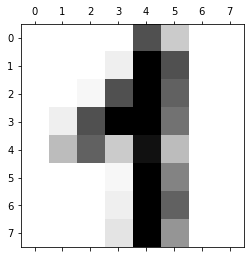

In [35]:
digits = load_digits()
plt.matshow(digits.images[42],cmap='Greys')
plt.show()